In [132]:
from matplotlib.pylab import rcParams
import xlrd
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

from keras.preprocessing.sequence import TimeseriesGenerator
from datetime import datetime
sns.set()

In [188]:
rcParams["figure.figsize"] = 15,10



df = pd.read_excel(
     os.path.join("Exc.xlsx"), engine='openpyxl')
df = df.rename(columns={"Umsatz":"value"})

In [109]:

close_data = df['Umsatz'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.77
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df['Time'][:split]
date_test = df['Time'][split:]

print(len(close_train))
print(len(close_test))

42
13


In [110]:
close_data.shape

(55, 1)

In [111]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

def get_scaler(scaler):
    scalers = {
        "minmax": MinMaxScaler,
        "standard": StandardScaler,
        "maxabs": MaxAbsScaler,
        "robust": RobustScaler,
    }
    return scalers.get(scaler.lower())()
# scaler = get_scaler('minmax')
# close_train = scaler.fit_transform(close_train)
# close_test = scaler.transform(close_test)


In [181]:
look_back = 2

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=4)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [186]:

from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(4,
        activation='relu',
        input_shape=(look_back,1))
)

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 100
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/100
10/10 [==============================] - 2s 198ms/step - loss: 565874711.3469
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 538751363.8906
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 473579777.8844
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 448376715.9266
Epoch 5/100
10/10 [==============================] - 0s 13ms/step - loss: 442431425.4906
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 386151436.1375
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 382029561.9812
Epoch 8/100
10/10 [==============================] - 0s 13ms/step - loss: 377817106.6094
Epoch 9/100
10/10 [==============================] - 0s 14ms/step - loss: 373350173.7000
Epoch 10/100
10/10 [==============================] - 0s 12ms/step - loss: 368844640.1656
Epoch 11/100
10/10 [==============================] - 0s 11ms/step - loss: 364849045.3547
Epoch 12/100
10/10 [

10/10 [==============================] - 0s 11ms/step - loss: 242228280.2871
Epoch 93/100
10/10 [==============================] - ETA: 0s - loss: 231903565.652 - 0s 13ms/step - loss: 241508712.7914
Epoch 94/100
10/10 [==============================] - 0s 7ms/step - loss: 241264180.2562
Epoch 95/100
10/10 [==============================] - 0s 4ms/step - loss: 241131032.6730
Epoch 96/100
10/10 [==============================] - 0s 13ms/step - loss: 240916691.8957
Epoch 97/100
10/10 [==============================] - 0s 11ms/step - loss: 240749818.6164
Epoch 98/100
10/10 [==============================] - 0s 11ms/step - loss: 240509400.3164
Epoch 99/100
10/10 [==============================] - 0s 11ms/step - loss: 240375188.0898
Epoch 100/100
10/10 [==============================] - 0s 11ms/step - loss: 240245661.8063


In [183]:
prediction = model.predict_generator(test_generator)


# close_train_arr = scaler.inverse_transform(close_train)
# close_test_arr = scaler.inverse_transform(close_test)
# prediction_arr = scaler.inverse_transform(prediction)

data_train = close_train.reshape((-1))
data_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

Text(0.5, 0, 'Zeit')

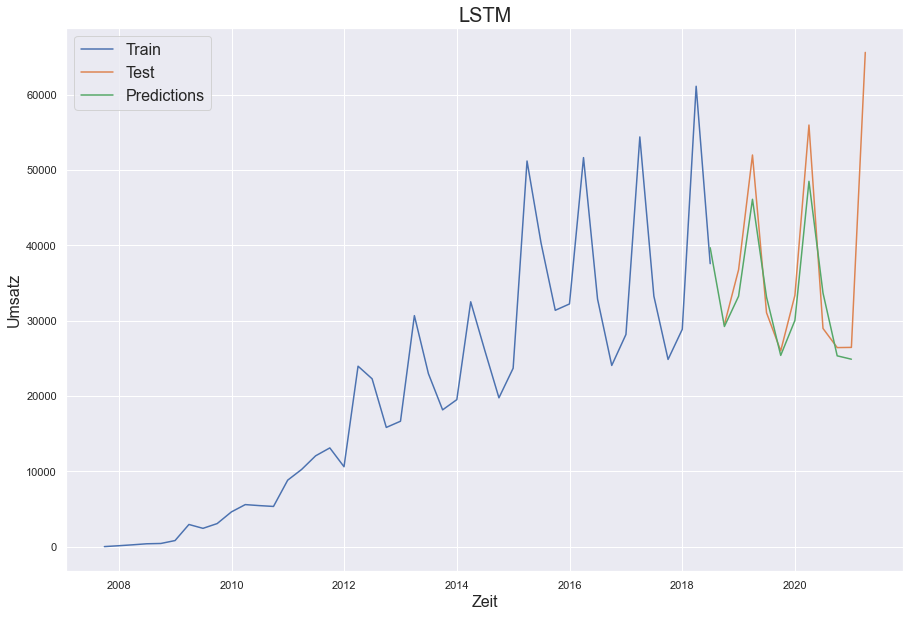

In [185]:
train = pd.DataFrame(df.Umsatz.values[:44], index = df.Time[:44])
test = pd.DataFrame(df.Umsatz.values[44:], index = df.Time[44:])
pred = pd.DataFrame(prediction, index = df.Time[43:54])
plt.plot(train)
plt.plot(test)
plt.plot(pred)
plt.legend(("Train","Test",'Predictions'), fontsize=16)

plt.title('LSTM', fontsize=20)
plt.ylabel('Umsatz', fontsize=16)
plt.xlabel("Zeit", fontsize=16)

In [130]:
data = df.Umsatz
data

0         5
1       118
2       241
3       378
4       419
5       806
6      2940
7      2427
8      3060
9      4606
10     5578
11     5445
12     5334
13     8822
14    10239
15    12053
16    13102
17    10604
18    23950
19    22276
20    15821
21    16645
22    30660
23    22955
24    18154
25    19510
26    32498
27    26064
28    19751
29    23678
30    51182
31    40282
32    31368
33    32209
34    51635
35    32857
36    24048
37    28160
38    54378
39    33249
40    24846
41    28846
42    61104
43    37559
44    29470
45    36755
46    51982
47    31051
48    25986
49    33362
50    55957
51    28962
52    26418
53    26444
54    65597
Name: Umsatz, dtype: int64

In [178]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error as mae, mean_squared_error
print("MSE:", mean_squared_error(data.values[44:], pred),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], pred),
      "MAE:", mae(data.values[44:], pred),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], pred)))

ValueError: Found input variables with inconsistent numbers of samples: [11, 12]